<h1 style="text-align: center;">MSc Data Science</h1>

<h2 style="text-align: center;">MDS573C: Image and Video Analytics</h2>

<h3 style="text-align: center;">CAT2 - Practical Component</h3>


<div style="text-align: right; font-family: Arial, sans-serif;">
<strong>Sanjay R</strong><br>
2348055<br>
5MDS
</div>

<h2 align="center" style="color:brown;font-size:200%">Connected Component Labeling and Region Analysis </h2>

# **Problem Statement**

 **Perform the following on the given image:**
 
**Write a Python program to perform connected component labeling on the binary image.**  
1. **Labeled regions with different colors**  
2. **Properties of the regions:**  
   - **Label ID of each pixel**  
   - **Area**
   - **Centroid**  
3. **Bounding box for each labeled region**  
4. **Region counting**  

**Use the function: `cv2.connectedComponentsWithStats(image, connectivity)**


In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.5/38.8 MB 4.1 MB/s eta 0:00:10
    --------------------------------------- 0.9/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.5/38.8 MB 6.8 MB/s eta 0:00:06
   -- ------------------------------------- 2.2/38.8 MB 8.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.0/38.8 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.0/38.8 MB 11.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.3/38.8 MB 12.9 MB/s eta 0:00:03
   ------ --------------------------------- 6.7/38.8 MB 14.8 MB/s eta 0:00:03
   -------- ------------------------------- 8.5/38.8 MB 17.0 MB/s eta 0:00:02
   ----

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('image3.jpg')  #Loading the image

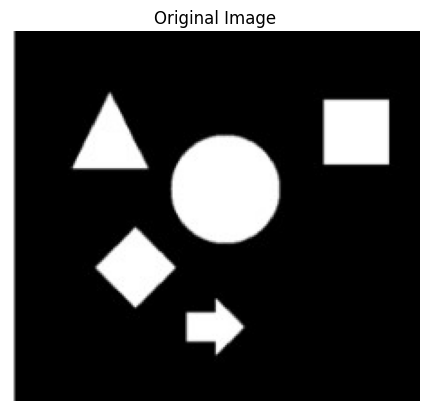

In [3]:
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")  
plt.show()

In [4]:
if len(image.shape) == 2:
    if np.unique(image).size <= 2:
        print("Original image is Binary")
    else:
        print("Original  image is Grayscale")
elif len(image.shape) == 3 and image.shape[2] == 3:
    print("Original  image is RGB")
else:
    print("Original  image is Unknown")

Original  image is RGB


## **Inference:**

- The original image was captured or stored in RGB format, containing three channels (Red, Green, Blue), each representing different intensity levels.  .


## **Grayscale Conversion:**
- A grayscale image reduces the complexity of working with three channels by combining the R, G, and B channels into a single intensity channel, preserving essential information.
- For tasks like connected component analysis and object detection, it is often easy to work with single-channel images to simplify computations.  

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

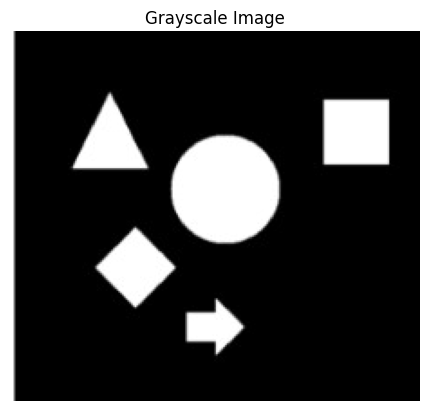

In [6]:
plt.imshow(gray_image, cmap='gray')  # Display using grayscale colormap
plt.title("Grayscale Image")
plt.axis("off")  # Turn off axes for better visualization
plt.show()

## **Binary Conversion:**
- In a binary image, pixel values are either 0 (background) or 255 (foreground), making it easier to detect distinct regions.  
- Binary images simplify computations and operations such as contour detection, labeling, and bounding box detection.

In [7]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

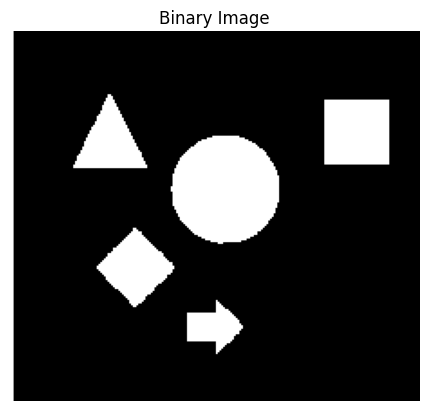

In [8]:
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")  # Turn off axes for better visualization
plt.show()

## **Connected Components Analysis:**

In [9]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

- In our case we have various shapes like circles, triangles, and diamonds, 8-connectivity is more appropriate to correctly identify these connected regions.
- **Connectivity=8** ensures that all neighboring pixels (horizontal, vertical, and diagonal) are considered when determining connected component

## **Displaying labeled image with different colors:**

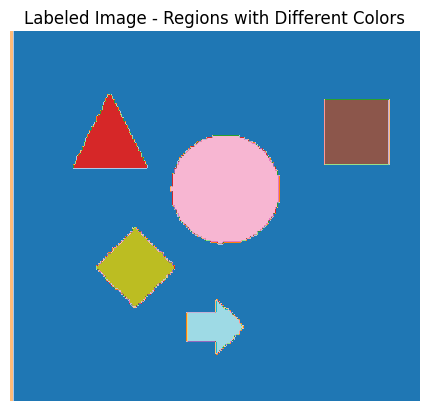

In [10]:
plt.imshow(labels, cmap='tab20')
plt.title("Labeled Image - Regions with Different Colors")
plt.axis("off")
plt.show()

## **Inference:**
- The image displays regions of connected components labeled with different colors.  
- Each distinct shape (triangle, square, circle, diamond, arrow) is recognized as a separate connected component.  
- Connected component analysis has identified and labeled individual objects from the background.  
- The colored regions represent unique components, making it easier to distinguish individual objects.


In [14]:
# Display region properties (Label ID, Area, Centroid)
for i in range(1, num_labels):
    print(f"Region ID: {i}")
    print(f"  - Area: {stats[i, cv2.CC_STAT_AREA]}")
    print(f"  - Centroid: {centroids[i]}")
    print(f"  - Bounding Box: {stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]}")
    print("")

Region ID: 1
  - Area: 410
  - Centroid: [  0.5 102. ]
  - Bounding Box: (0, 0, 2, 205)

Region ID: 2
  - Area: 893
  - Centroid: [54.91265398 61.38297872]
  - Bounding Box: (35, 35, 41, 41)

Region ID: 3
  - Area: 1296
  - Centroid: [191.5  55.5]
  - Bounding Box: (174, 38, 36, 36)

Region ID: 4
  - Area: 2832
  - Centroid: [118.82132768  87.15042373]
  - Bounding Box: (89, 58, 60, 60)

Region ID: 5
  - Area: 996
  - Centroid: [ 69.07730924 130.6686747 ]
  - Bounding Box: (48, 109, 43, 44)

Region ID: 6
  - Area: 507
  - Centroid: [112.11242604 163.46153846]
  - Bounding Box: (98, 149, 31, 30)



## **Interpretation:**

- **Region ID: 1** corresponds to a **triangle** with an area of 410, indicating a small, elongated shape. The centroid at [0.5, 102] reflects its narrow, vertical orientation.

- **Region ID: 2** represents a **square** with an area of 893, showcasing a medium-sized, well-spread shape. The centroid at [54.91, 61.38] indicates a centrally located region, while the bounding box (35, 35, 41, 41) supports its compact, square-like form.  

- **Region ID: 3** is also identified as a **circle** with a larger area of 1296, positioned centrally. The centroid at [191.5, 55.5] further emphasizes this compact, well-centered shape.  

- **Region ID: 4** represents a **rectangle** with an area of 2832, indicating a large, spread-out shape. The centroid at [118.82, 87.15] suggests an elongated orientation, and the bounding box (89, 58, 60, 60) confirms its more rectangular shape. (The Background)

- **Region ID: 5** corresponds to an **arrow** shape with an area of 996, presenting a medium-sized, elongated region. The centroid at [69.08, 130.67] positions it towards the lower-right, and the bounding box (48, 109, 43, 44) reflects its vertical elongation.  

- **Region ID: 6** corresponds to a **diamond** shape with an area of 507, indicating a medium-sized, compact region. The centroid at [112.11, 163.46] places it towards the upper-right, while the bounding box (98, 149, 31, 30) highlights its diamond-like, elongated rectangular shape.  


## **Display bounding boxes:**

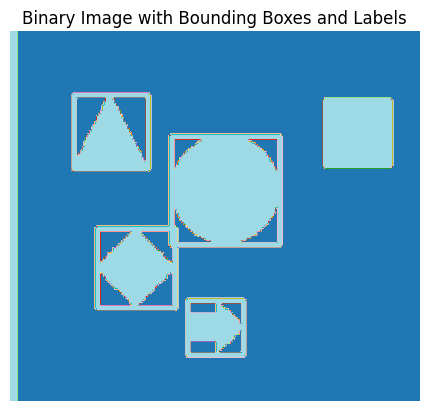

In [11]:
for i in range(1, num_labels):
    x, y, w, h, _ = stats[i]
    cv2.rectangle(binary_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(binary_image, cmap='tab20')
plt.title("Binary Image with Bounding Boxes and Labels")
plt.axis("off")
plt.show()

## **Inference:**
- The image contains five distinct shapes: a triangle, a circle, a square, a diamond, and an arrow.
- Each shape is enclosed within a square boundary.  
- This is the visualization of connected components with bounding boxes.  

## **Region counting:**

In [15]:
print(f"Total number of connected components: {num_labels - 1}") # Excluding background component

Total number of connected components: 6


## **Conclusion**  
The total number of connected components identified in the analysis is 5. Each connected component represents a distinct shape, accurately labeled and analyzed based on its properties such as area, centroid, and bounding box.  